<a href="https://colab.research.google.com/github/khalisi-1906/zeotap_/blob/main/Neha_Narayankar_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
import kagglehub
kagglehub.login()


In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

nehankar_customerzeotap_path = kagglehub.dataset_download('nehankar/customerzeotap')

print('Data source import complete.')


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customerzeotap/Products.csv
/kaggle/input/customerzeotap/Customers.csv
/kaggle/input/customerzeotap/Transactions.csv


In [ ]:
cus_data= pd.read_csv('/kaggle/input/customerzeotap/Customers.csv')
prod_data= pd.read_csv('/kaggle/input/customerzeotap/Products.csv')
trans_data= pd.read_csv('/kaggle/input/customerzeotap/Transactions.csv')


In [ ]:
print(cus_data.head())
print(prod_data.head())
print(trans_data.head())

  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3       

In [ ]:
# Check data structure
print(cus_data.info())
print(prod_data.info())
print(trans_data.info())

# Check for missing values
print(cus_data.isnull().sum())
print(prod_data.isnull().sum())
print(trans_data.isnull().sum())

# Check for duplicates
print(cus_data.duplicated().sum())
print(prod_data.duplicated().sum())
print(trans_data.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.2+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------

show how many features (columns) and observations (rows) there are in the dataset.

In [ ]:
print(cus_data.describe())
print(prod_data.describe())
print(trans_data.describe())

# Unique values in categorical columns
for col in cus.data.select_dtypes(include='object').columns:
    print(f"{col}: {cus_data[col].nunique()} unique values")

       CustomerID      CustomerName         Region  SignupDate
count         200               200            200         200
unique        200               200              4         179
top         C0001  Lawrence Carroll  South America  2024-11-11
freq            1                 1             59           3
            Price
count  100.000000
mean   267.551700
std    143.219383
min     16.080000
25%    147.767500
50%    292.875000
75%    397.090000
max    497.760000
          Quantity   TotalValue       Price
count  1000.000000  1000.000000  1000.00000
mean      2.537000   689.995560   272.55407
std       1.117981   493.144478   140.73639
min       1.000000    16.080000    16.08000
25%       2.000000   295.295000   147.95000
50%       3.000000   588.880000   299.93000
75%       4.000000  1011.660000   404.40000
max       4.000000  1991.040000   497.76000


NameError: name 'cus' is not defined

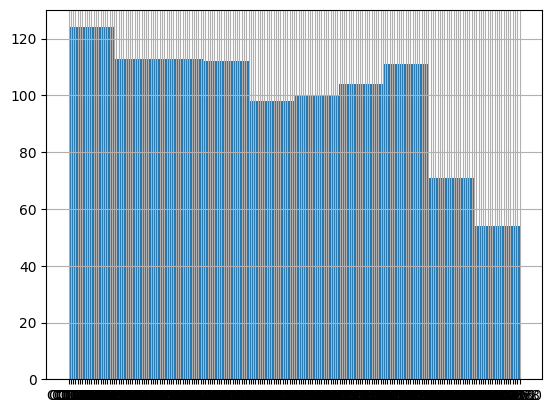

In [ ]:
import matplotlib.pyplot as plt
data['CustomerID'].hist()
plt.show()

In [ ]:
(data.isnull().sum()/(len(data)))*100



TransactionID      0.0
CustomerID         0.0
ProductID          0.0
TransactionDate    0.0
Quantity           0.0
TotalValue         0.0
Price              0.0
dtype: float64

Customer demographics // EXPLORATORY VISUALISATIONS

In [ ]:
import seaborn as sns

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

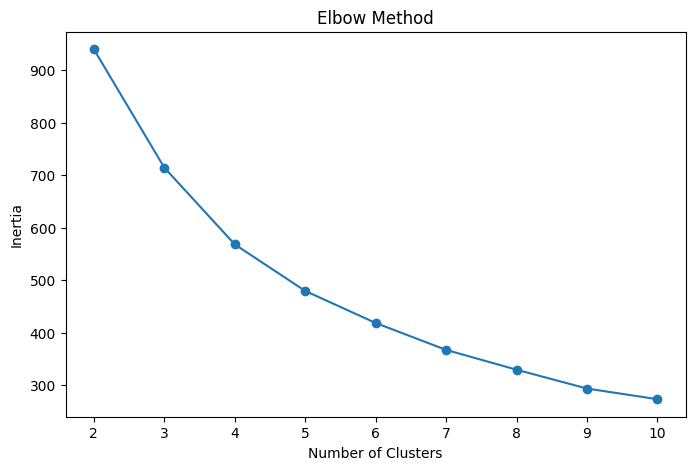

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Davies-Bouldin Index: 1.2331969726694625
Silhouette Score: 0.3240570315387671


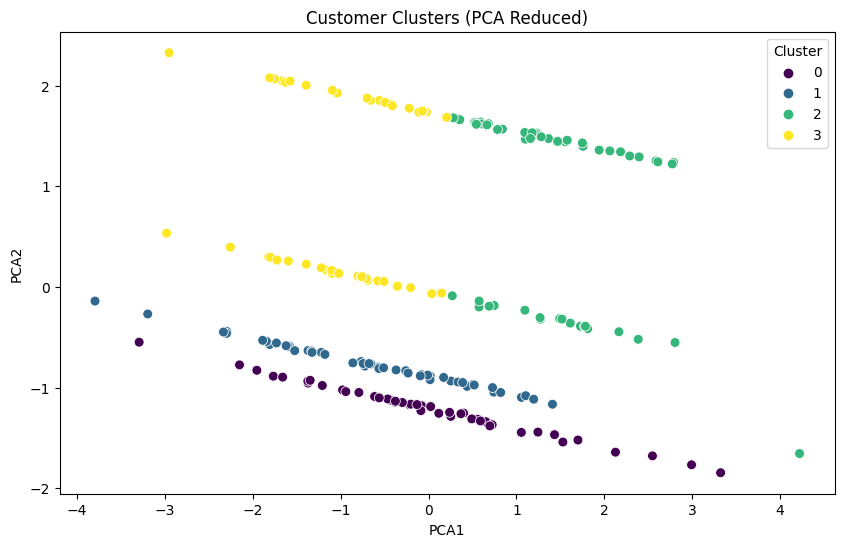

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import davies_bouldin_score, silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load Datasets
cus = pd.read_csv('/kaggle/input/customerzeotap/Customers.csv')
trans = pd.read_csv('/kaggle/input/customerzeotap/Transactions.csv')

# Step 2: Merge Datasets
data = pd.merge(trans, cus, on='CustomerID')

# Step 3: Feature Engineering
# Aggregate transaction data for each customer
cus_metrics = data.groupby('CustomerID').agg({
    'TotalValue': 'sum',       # Total spend
    'TransactionID': 'count',  # Frequency of transactions
    'Price': 'mean',           # Average transaction value
}).rename(columns={'TransactionID': 'TransactionFrequency'})

# Add customer profile features (e.g., Region)
cus_metrics = pd.merge(cus_metrics, cus[['CustomerID', 'Region']], on='CustomerID')

# One-hot encode categorical variables
cus_metrics = pd.get_dummies(cus_metrics, columns=['Region'], drop_first=True)

# Step 4: Data Normalization
scaler = StandardScaler()
normalized_data = scaler.fit_transform(cus_metrics.drop(columns=['CustomerID']))

# Step 5: Apply Clustering
# Choose optimal number of clusters using Elbow Method
inertia = []
range_clusters = range(2, 11)

for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(normalized_data)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(range_clusters, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# Final KMeans Clustering with chosen K (e.g., 4)
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(normalized_data)

# Step 6: Evaluate Clustering
db_index = davies_bouldin_score(normalized_data, clusters)
sil_score = silhouette_score(normalized_data, clusters)

print(f"Davies-Bouldin Index: {db_index}")
print(f"Silhouette Score: {sil_score}")

# Add cluster labels to the dataset
cus_metrics['Cluster'] = clusters

# Step 7: Visualize Clusters
# Reduce dimensions with PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(normalized_data)
cus_metrics['PCA1'] = reduced_data[:, 0]
cus_metrics['PCA2'] = reduced_data[:, 1]

# Plot clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='PCA1', y='PCA2', hue='Cluster', data=customer_metrics, palette='viridis', s=50
)
plt.title('Customer Clusters (PCA Reduced)')
plt.show()

# Step 8: Save Results
cus_metrics.to_csv('Customer_Segments.csv', index=False)
